(only tesed on Python 3.6)

this notebook shows how to use the stereo module in leelab toolbox to handle Brown stereo dataset.

In [1]:
# change `inline` to `notebook` if you want to rotate the 3D plot.
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import os.path
from leelabtoolbox.stereo import io as stereo_io, conversion as stereo_conversion
from copy import copy

In [2]:
example_scene_file = os.path.join('..','tests','stereo_ref','brown','V3_4.bin')
scene_struct = stereo_io.brown_raw_to_retina2_sph(stereo_io.read_brown_image_image_database(example_scene_file))

# this doesn't fix elevation unit conversion.
scene_struct_2 = stereo_io.brown_raw_to_retina2_sph(stereo_io.read_brown_image_image_database(example_scene_file),
                                                   bearing_factor=1)
# this won't give you sensible result.

In [3]:
# number of bad points. very few.
scene_struct['distance_mask'].sum()

21

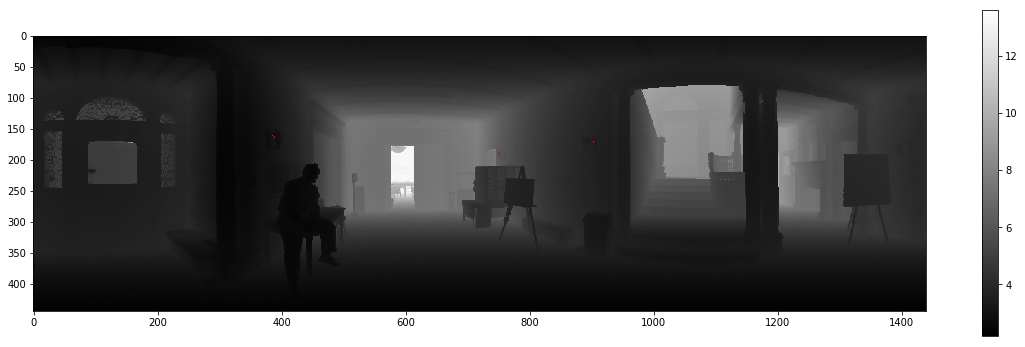

2.176 13.592


In [4]:
distance_mask = scene_struct['distance_mask']
distance = scene_struct['distance'].copy()
distance[distance_mask]=np.nan
cmap=copy(matplotlib.cm.gray)
# set nan to red
# <https://stackoverflow.com/questions/2578752/how-can-i-plot-nan-values-as-a-special-color-with-imshow-in-matplotlib>
# <https://stackoverflow.com/questions/35905393/python-leave-numpy-nan-values-from-matplotlib-heatmap-and-its-legend>
cmap.set_bad('red')
# show the range map
plt.close('all')
plt.figure(figsize=(20, 6))
plt.imshow(distance, cmap=cmap)
plt.colorbar()
plt.show()
print(np.nanmin(distance), np.nanmax(distance))

In [5]:
# then convert to xyz.
valid_mask = np.logical_not(distance_mask)
xyz_valid = stereo_conversion.sph2cart(scene_struct['distance'][valid_mask],
                                       scene_struct['latitude'][valid_mask],
                                       scene_struct['longitude'][valid_mask], convention='retina2')

# whether multiply by 2 or not for 'bearing':
# if you use the below one, where we don't multiply by 2 for bearing in Brown, and if you pan over the below 3D plot,
# you will that it makes no sense.

# xyz_valid = stereo_conversion.sph2cart(scene_struct_2['distance'][valid_mask],
#                                        scene_struct_2['latitude'][valid_mask],
#                                        scene_struct_2['longitude'][valid_mask], convention='retina2')

# whether the unit of inclination is correct.
# based on printed out values below, you can see that this the camera is surrounded by the captured scene, and you 
# can find points behind camera (positive z) as well.
# based on panning the below 3D plot, it seems that unit of inclination is correct.

print(xyz_valid.z.min(), xyz_valid.z.max())
print(scene_struct['longitude'].min(), scene_struct['longitude'].max())

-12.5431422323 2.74556621849
-2.26436127091 2.27021356528


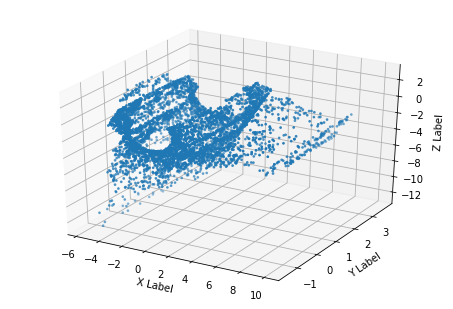

In [6]:
from mpl_toolkits.mplot3d import Axes3D

# randomly sample 30000 points.
rng_state = np.random.RandomState(seed=0)
xyz_valid = np.asarray(xyz_valid)
xyz_valid_reduced = xyz_valid[:, rng_state.choice(xyz_valid.shape[1], 5000)]
fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(*xyz_valid_reduced, s=3)

ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_zlabel('Z Label')

plt.show()

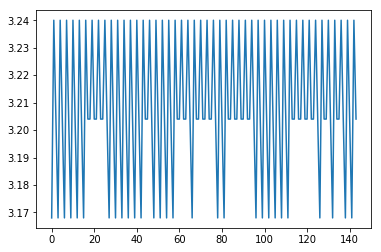

In [7]:
# along each row and col, the long/lat have some systematic small drifting. just ignore them, assuming they are the same.
plt.plot(scene_struct['latitude'][200,::10]*180/np.pi)

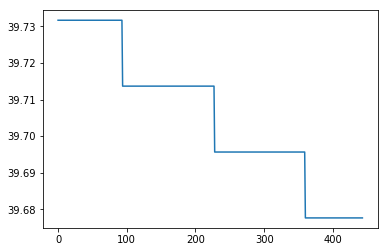

In [8]:
plt.plot(scene_struct['longitude'][:, 500]*180/np.pi)